In [101]:
# imports

# data manipulation
import pandas as pd
import numpy as np

# visualiation
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# feature engineering
from sklearn.preprocessing import StandardScaler

# model training
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# classifiers
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.tree import DecisionTreeClassifier # decision tree
from sklearn.ensemble import RandomForestClassifier # random forest
from sklearn.ensemble import GradientBoostingClassifier # gradient boosting

In [3]:
# load data
train_file = './data/train.csv'
train_data = pd.read_csv(train_file)
train_data = pd.DataFrame(data=train_data)

test_file = './data/test.csv'
test_data = pd.read_csv(test_file)
test_data = pd.DataFrame(data=test_data)

test_ground_truths_file = './test_ground_truths.csv'
test_ground_truths = pd.read_csv(test_ground_truths_file)
test_ground_truths = pd.DataFrame(data=test_ground_truths)

test_data['exceeds50K'] = test_ground_truths

Text(0, 0.5, 'Number of samples')

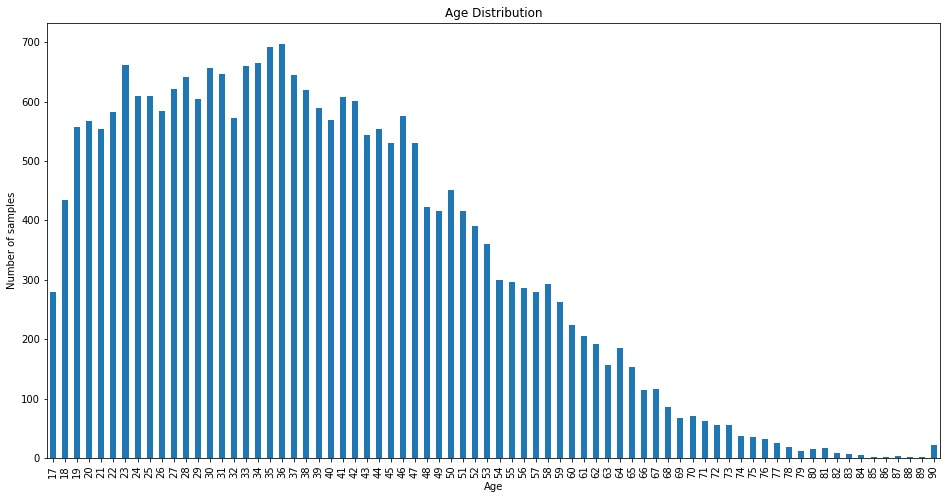

In [4]:
# Age Distribution
#age_counts_binned = pd.cut(train_data['age'], bins=10, include_lowest=True)

age_counts_graph = train_data['age'].value_counts(sort=False).sort_index().plot(kind='bar', title='Age Distribution',  figsize=(16,8))
age_counts_graph.set_xlabel("Age")
age_counts_graph.set_ylabel("Number of samples")

In [5]:
# Remove records with missing data (" ?") - CANT USE THIS BECAUSE TEST DATA ALSO HAS " ?" VALUES
def cleanData(data):
    # workclass
    missing_data_workclass = data[data.workclass == ' ?']
    print("Percentage of missing work class data = " + "{:.2f}".format(missing_data_workclass.shape[0] / data.shape[0] * 100) + "%" )

    # occupation
    missing_data_occupation = data[data.occupation == ' ?']
    print("Percentage of missing occupation data = " + "{:.2f}".format(missing_data_occupation.shape[0] / data.shape[0] * 100) + "%" )

    # native-country
    missing_data_native_country = data[data['native-country'] == ' ?']
    print("Percentage of missing native country data = " + "{:.2f}".format(missing_data_native_country.shape[0] / data.shape[0] * 100) + "%" )

    # all
    missing_data = data[(data['workclass'] == ' ?') | (data['occupation'] == ' ?') | (data['native-country'] == ' ?')]
    print("Percentage of missing data = " + "{:.2f}".format(missing_data.shape[0] / data.shape[0] * 100) + "%" )

    # Cleaned data

    cleaned_data = data[(data['workclass'] != ' ?') & (data['occupation'] != ' ?') & (data['native-country'] != ' ?')]
    print("Percentage of remaining cleaned data = " + "{:.2f}".format(cleaned_data.shape[0] / data.shape[0] * 100) + "%" )
    
    return cleaned_data

cleaned_train_data = cleanData(train_data)
cleaned_test_data = cleanData(test_data)

Percentage of missing work class data = 5.70%
Percentage of missing occupation data = 5.73%
Percentage of missing native country data = 1.68%
Percentage of missing data = 7.32%
Percentage of remaining cleaned data = 92.68%
Percentage of missing work class data = 5.76%
Percentage of missing occupation data = 5.77%
Percentage of missing native country data = 1.83%
Percentage of missing data = 7.50%
Percentage of remaining cleaned data = 92.50%


In [122]:
# categorical
def preprocess(data):
    preprocessed_data = data.copy()
    
    # too many categories, drop for now
    preprocessed_data = preprocessed_data.drop(['native-country'], axis=1)
    
    #preprocessed_data.age = pd.qcut(preprocessed_data.age, 10, duplicates='drop')
    #preprocessed_data['capital-gain'] = pd.cut(preprocessed_data['capital-gain'], bins=[-1,1,10000,100000,999999], duplicates='drop')
    #preprocessed_data['capital-loss'] = pd.cut(preprocessed_data['capital-loss'], bins=[-1,1,999999], duplicates='drop')
    #preprocessed_data['hours-per-week'] = pd.qcut(preprocessed_data['hours-per-week'], 5, duplicates='drop')
    preprocessed_data = preprocessed_data.drop(['education'], axis=1)
    preprocessed_data = pd.get_dummies(preprocessed_data)
    
    return preprocessed_data

def getNumericalColumns(data):
    numerical_columns = data[['capital-gain', 'capital-loss', 'education-num', 'age', 'exceeds50K']]
    return numerical_columns

#preprocessed_train_data = preprocess(train_data)
#preprocessed_test_data = preprocess(test_data)

preprocessed_train_data = getNumericalColumns(train_data)
preprocessed_test_data = getNumericalColumns(test_data)

x_train = preprocessed_train_data.drop('exceeds50K', axis=1)
y_train = preprocessed_train_data['exceeds50K']
#normalization needs more effort
x_train = StandardScaler().fit_transform(x_train)
#netherlands = np.zeros(x_train.shape[0])
#x_train['native-country_ Holand-Netherlands'] = netherlands
print(x_train.shape)

#normalization needs more effort
x_test = preprocessed_test_data.drop('exceeds50K', axis=1)
y_test = preprocessed_test_data['exceeds50K']
x_test = StandardScaler().fit_transform(x_test)
print(x_test.shape)

(24421, 4)
(24421, 4)


In [123]:
# CHECK FEATURE IMPORTANCE
classifier = GradientBoostingClassifier()
model = classifier.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(round(f1_score(y_test, y_pred, average='weighted') * 100, 2))
print(round(accuracy_score(y_test, y_pred) * 100, 2))

predictors = [x for x in x_train.columns if x not in ['exceeds50K']]
feat_imp = pd.Series(model.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances', figsize=(16,5))
plt.ylabel('Feature Importance Score')

79.04
81.44


AttributeError: 'numpy.ndarray' object has no attribute 'columns'